In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('infringement_dataset.csv')

In [3]:
df1 = df[['infringed','annual_income','credit_amount','past_loans_approved','past_loans_refused']].loc[0:19]

In [4]:
df1

,infringed,annual_income,credit_amount,past_loans_approved,past_loans_refused
0,1,202500.000,406597.5,1.0,0.0
1,0,270000.000,1293502.5,3.0,0.0
2,0,67500.000,135000.0,1.0,0.0
3,0,135000.000,312682.5,5.0,3.0
4,0,121500.000,513000.0,6.0,0.0
5,0,99000.000,490495.5,4.0,1.0
6,0,171000.000,1560726.0,7.0,0.0
7,0,360000.000,1530000.0,1.0,0.0
8,0,112500.000,1019610.0,3.0,0.0
9,0,135000.000,405000.0,3.0,1.0


### Visualizando o PCA1 (o principal)

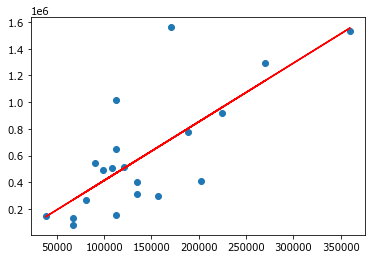

In [5]:
coefficients = np.polyfit(df1['annual_income'], df1['credit_amount'], 1)
slope = coefficients[0]
intercept = coefficients[1]
trendline = slope * np.array(df1['annual_income']) + intercept

plt.scatter(df1['annual_income'],df1['credit_amount'])
plt.plot(df1['annual_income'], trendline, label='Linha de tendência', color='red')
plt.show()

### Primeiras infos PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
X = df1.iloc[:,1:]
y = df1['infringed']

# Inicialize o modelo PCA com o número de componentes desejado (por exemplo, 2 componentes)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)

# Obtenha as proporções de variância explicada
explained_variance = pca.explained_variance_ratio_

# Obtenha os autovalores
eigenvalues = pca.explained_variance_

print(explained_variance)
print(eigenvalues)

[9.87819148e-01 1.21808523e-02 1.35137041e-11 1.88072872e-12]
[2.06126322e+11 2.54175502e+09 2.81987864e+00 3.92448044e-01]


### Scree plot

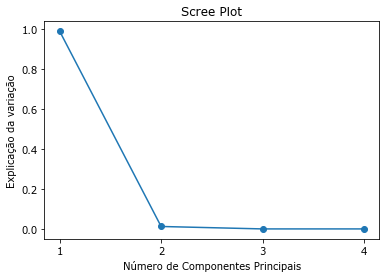

In [9]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Explicação da variação')
plt.title('Scree Plot')

plt.show()

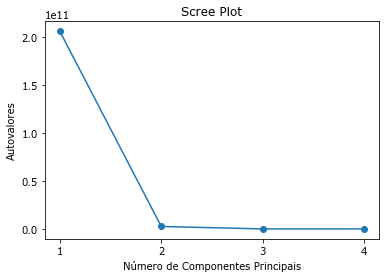

In [10]:
plt.plot(range(1, len(explained_variance) + 1), eigenvalues, marker='o', linestyle='-')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Autovalores')
plt.title('Scree Plot')

plt.show()

Este segundo é o scree plot que estamos acostumados, que mostra no eixo Y os autovalores.

### Score plot

In [21]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

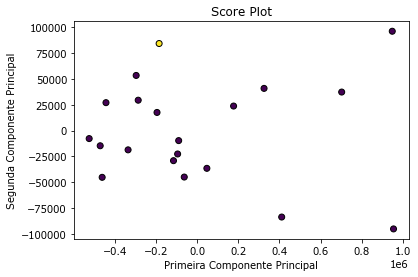

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Score Plot')

plt.show()

### Loadings

In [31]:
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)

In [42]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4'], index=X.columns)
norm_loadings = loadings.div(loadings.sum(axis=1), axis=0)
round(norm_loadings,3)

,PC1,PC2,PC3,PC4
annual_income,0.115,0.885,0.000,-0.000
credit_amount,1.149,-0.149,-0.000,0.000
past_loans_approved,0.000,-0.000,1.254,-0.254
past_loans_refused,-0.000,0.000,0.169,0.831


As colunas do dataframe contêm os autovetores associados aos dois primeiros componentes principais. Cada elemento representa quanto cada variável original contribui para o componente principal correspondente. Por exemplo, annual_income é responsável por 11,5% de PC1.

In [16]:
loadings1 = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = round(pd.DataFrame(loadings1, columns=['PC1','PC2','PC3','PC4'], index=X.columns),3)
loading_matrix

,PC1,PC2,PC3,PC4
annual_income,58322.013,49998.115,0.000,-0.000
credit_amount,450249.780,-6476.384,-0.000,0.000
past_loans_approved,0.346,-0.886,1.646,-0.125
past_loans_refused,-0.136,0.080,0.334,0.614


Aqui cada entrada da matriz contém a correlação entre a variável original e o componente principal. Por exemplo, past_loans_approved e o primeiro componente principal PC1 têm uma correlação de 34,6%.

### Loading plot

In [26]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

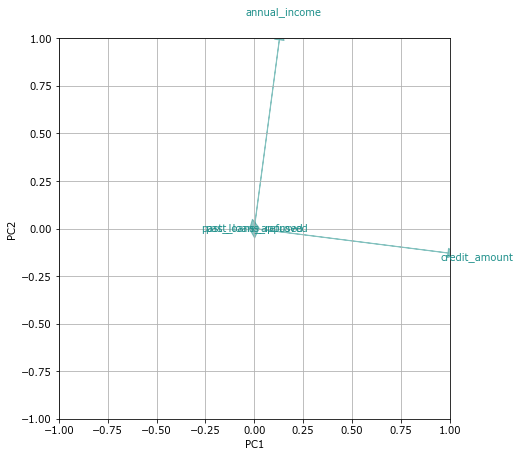

In [27]:
fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca.components_.T, X.columns)